In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('electric_vehicle_sales_by_state.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Extract year and month for further analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Display the first few rows
print(df.head())


        date   state vehicle_category  electric_vehicles_sold  \
0 2021-04-01  Sikkim       2-Wheelers                       0   
1 2021-04-01  Sikkim       4-Wheelers                       0   
2 2021-05-01  Sikkim       2-Wheelers                       0   
3 2021-05-01  Sikkim       4-Wheelers                       0   
4 2021-06-01  Sikkim       2-Wheelers                       0   

   total_vehicles_sold  year  month  
0                  398  2021      4  
1                  361  2021      4  
2                  113  2021      5  
3                   98  2021      5  
4                  229  2021      6  


In [3]:
# Group by state and sum the electric vehicles sold
state_ev_sales = df.groupby('state')['electric_vehicles_sold'].sum().reset_index()

# Sort states by total EV sales in descending order
state_ev_sales = state_ev_sales.sort_values(by='electric_vehicles_sold', ascending=False)

# Display the aggregated data
print(state_ev_sales)


                       state  electric_vehicles_sold
20               Maharashtra                  396045
16                 Karnataka                  312995
30                Tamil Nadu                  200062
11                   Gujarat                  181389
28                 Rajasthan                  150366
17                    Kerala                  137060
9                      Delhi                  107312
32             Uttar Pradesh                   95203
19            Madhya Pradesh                   78979
25                    Odisha                   78267
2             Andhra Pradesh                   77422
7               Chhattisgarh                   53804
5                      Bihar                   31019
12                   Haryana                   30797
34               West Bengal                   30560
27                    Punjab                   23833
10                       Goa                   19684
15                 Jharkhand                  

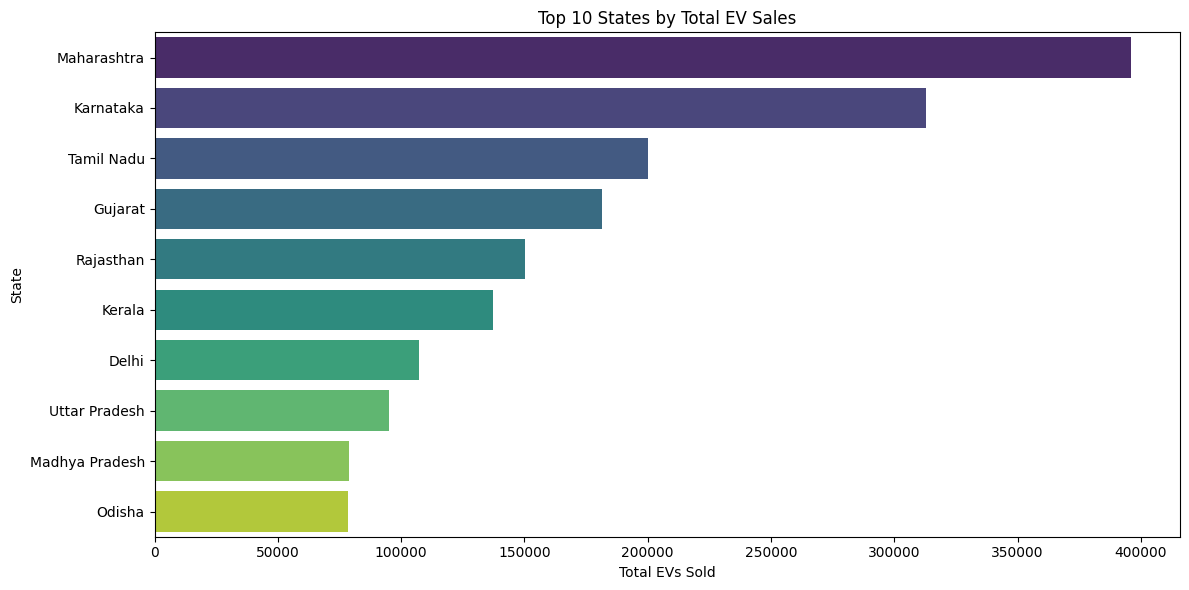

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 states
top_states = state_ev_sales.head(10)

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a barplot
sns.barplot(x='electric_vehicles_sold', y='state', data=top_states, palette='viridis')

# Set plot titles and labels
plt.title('Top 10 States by Total EV Sales')
plt.xlabel('Total EVs Sold')
plt.ylabel('State')

# Display the plot
plt.tight_layout()
plt.show()


In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('electric_vehicle_sales_by_state.csv')

# Preview the data
print(df.head())


        date   state vehicle_category  electric_vehicles_sold  \
0  01-Apr-21  Sikkim       2-Wheelers                       0   
1  01-Apr-21  Sikkim       4-Wheelers                       0   
2  01-May-21  Sikkim       2-Wheelers                       0   
3  01-May-21  Sikkim       4-Wheelers                       0   
4  01-Jun-21  Sikkim       2-Wheelers                       0   

   total_vehicles_sold  
0                  398  
1                  361  
2                  113  
3                   98  
4                  229  


In [6]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# View unique vehicle types
print("Unique vehicle types:", df['vehicle_category'].unique())


Unique vehicle types: ['2-Wheelers' '4-Wheelers']


In [7]:
# Filter each vehicle type
two_wheelers = df[df['vehicle_category'] == '2-Wheelers']

four_wheelers = df[df['vehicle_category'] == '4-Wheelers']


In [8]:
# Aggregate for each vehicle type
two_w_state = two_wheelers.groupby('state')['electric_vehicles_sold'].sum().reset_index()

four_w_state = four_wheelers.groupby('state')['electric_vehicles_sold'].sum().reset_index()

# Sort for visualization
two_w_state = two_w_state.sort_values(by='electric_vehicles_sold', ascending=False)

four_w_state = four_w_state.sort_values(by='electric_vehicles_sold', ascending=False)


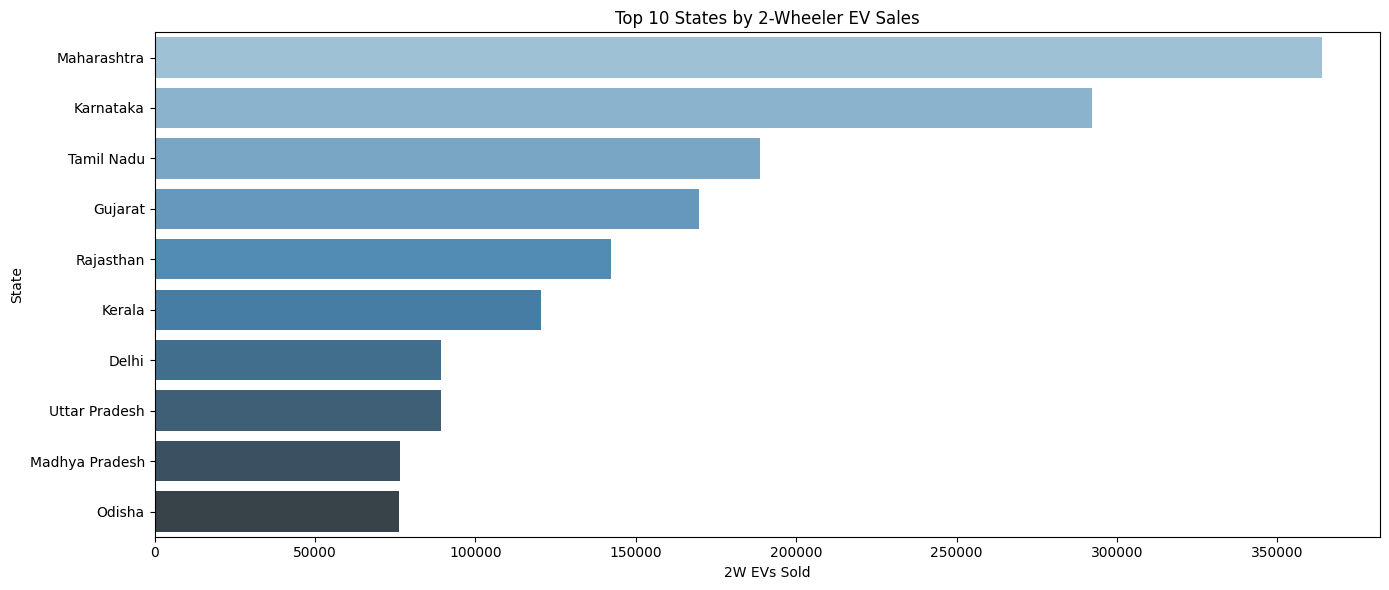

In [9]:
# Set the plot size
plt.figure(figsize=(14, 6))
sns.barplot(x='electric_vehicles_sold', y='state', data=two_w_state.head(10), palette='Blues_d')
plt.title('Top 10 States by 2-Wheeler EV Sales')
plt.xlabel('2W EVs Sold')
plt.ylabel('State')
plt.tight_layout()
plt.show()

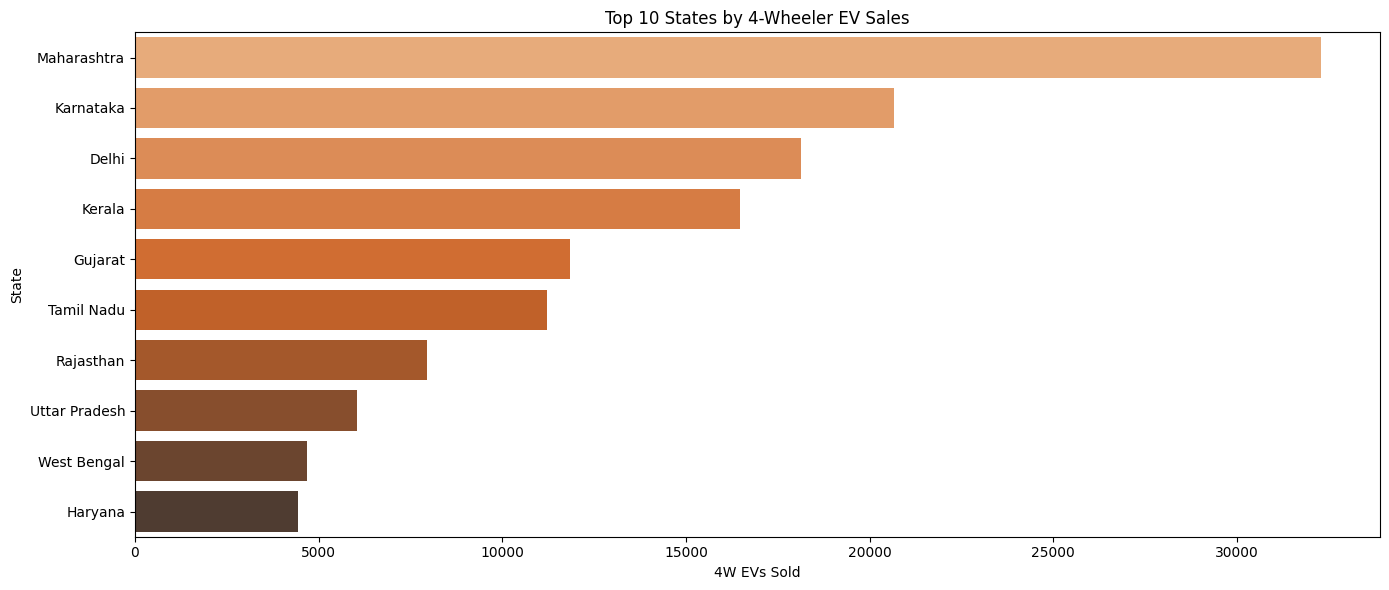

In [10]:
plt.figure(figsize=(14, 6))
sns.barplot(x='electric_vehicles_sold', y='state', data=four_w_state.head(10), palette='Oranges_d')
plt.title('Top 10 States by 4-Wheeler EV Sales')
plt.xlabel('4W EVs Sold')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [12]:
# Combine data into a pivot table
pivot_df = df.groupby(['state', 'vehicle_category'])['electric_vehicles_sold'].sum().reset_index()

# Pivot table to get separate columns for 2W, 3W, 4W
pivot_df = pivot_df.pivot(index='state', columns='vehicle_category', values='electric_vehicles_sold').fillna(0)

# Rename columns for clarity
pivot_df.columns = ['2W', '4W']

# Reset index to make 'state' a column
pivot_df.reset_index(inplace=True)

# View the resulting DataFrame
print(pivot_df.head())


                      state     2W    4W
0         Andaman & Nicobar      2     0
1  Andaman & Nicobar Island     35    43
2            Andhra Pradesh  74099  3323
3         Arunachal Pradesh      4    29
4                     Assam   5963   455


In [13]:
from sklearn.preprocessing import StandardScaler

# Extract only numerical features
X = pivot_df[['2W', '4W']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

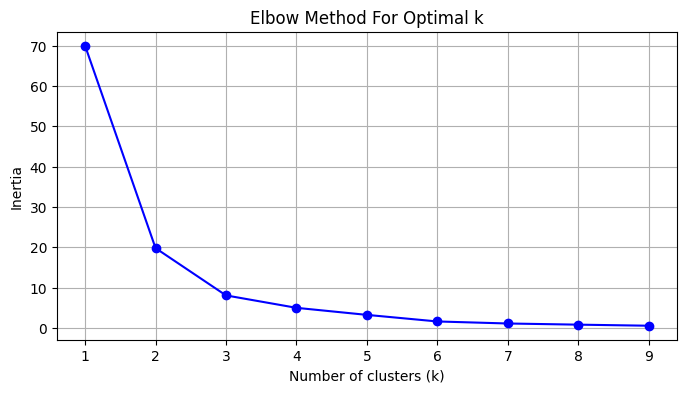

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k
inertia = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [15]:
#  k=4 based on elbow curve
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_scaled)

# View the clusters
print(pivot_df[['state', '2W', '4W', 'cluster']])


                       state      2W     4W  cluster
0          Andaman & Nicobar       2      0        3
1   Andaman & Nicobar Island      35     43        3
2             Andhra Pradesh   74099   3323        0
3          Arunachal Pradesh       4     29        3
4                      Assam    5963    455        3
5                      Bihar   30020    999        3
6                 Chandigarh    3654   1625        3
7               Chhattisgarh   51889   1915        0
8                 DNH and DD     281     74        3
9                      Delhi   89178  18134        2
10                       Goa   17634   2050        3
11                   Gujarat  169557  11832        2
12                   Haryana   26355   4442        0
13          Himachal Pradesh    2351    244        3
14         Jammu and Kashmir    5723    248        3
15                 Jharkhand   17686    775        3
16                 Karnataka  292329  20666        1
17                    Kerala  120593  16467   

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


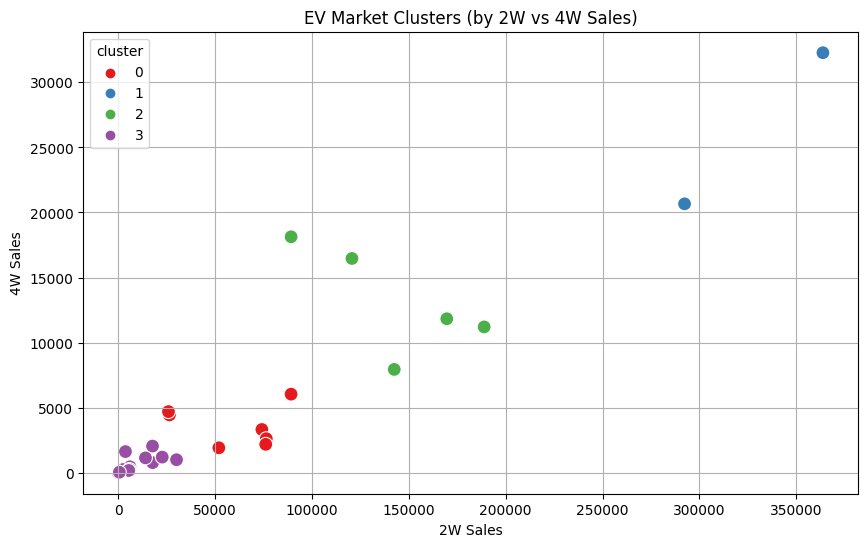

In [16]:
import seaborn as sns

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pivot_df, x='2W', y='4W', hue='cluster', palette='Set1', s=100)
plt.title('EV Market Clusters (by 2W vs 4W Sales)')
plt.xlabel('2W Sales')
plt.ylabel('4W Sales')
plt.grid(True)
plt.show()


✅ Cluster Interpretation


Cluster 0 (🔴): Low Adoption – Low 2W & 4W sales; early-stage EV regions.

Cluster 1 (🔵): High Adoption – Strong 2W & 4W sales; developed EV markets.

Cluster 2 (🟢): Moderate Adoption – High 2W, mid 4W sales; Tier-2 focused.

Cluster 3 (🟣): Emerging – Very low sales; future potential.

